# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [6]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [8]:

print("Описание набора данных:")
print(diabetes.DESCR)

print("\nНаименования признаков:")
print(diabetes.feature_names)


Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [9]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target


print("Первые 5 строк набора данных:")
print(diabetes_df.head())

Первые 5 строк набора данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [10]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print("Информация о наборе данных:")
print(diabetes_df.info())

categorical_columns = diabetes_df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\nКатегориальные признаки в наборе данных:")
    print(categorical_columns.tolist())
else:
    print("\nКатегориальных признаков в наборе данных нет.")

missing_values = diabetes_df.isnull().sum().sum()
if missing_values > 0:
    print(f"\nВ наборе данных есть пропущенные значения: {missing_values}")
else:
    print("\nПропущенных значений в наборе данных нет.")

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Категориальных признаков в наборе данных нет.

Пропущенных значений в наборе данных нет.


## Исследование данных

4. Постройте матрицу корреляции.

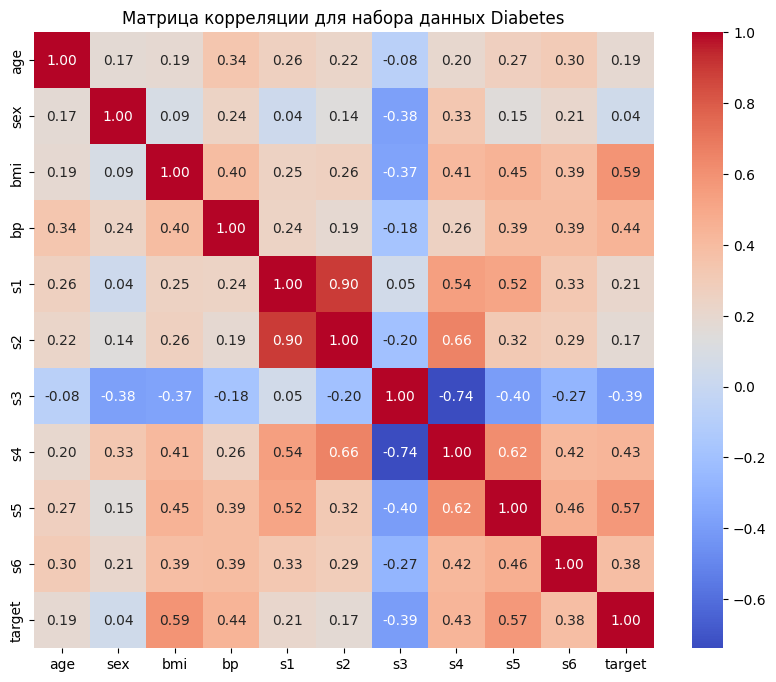

In [16]:
import seaborn as sns
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

correlation_matrix = diabetes_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляции для набора данных Diabetes")
plt.show()

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

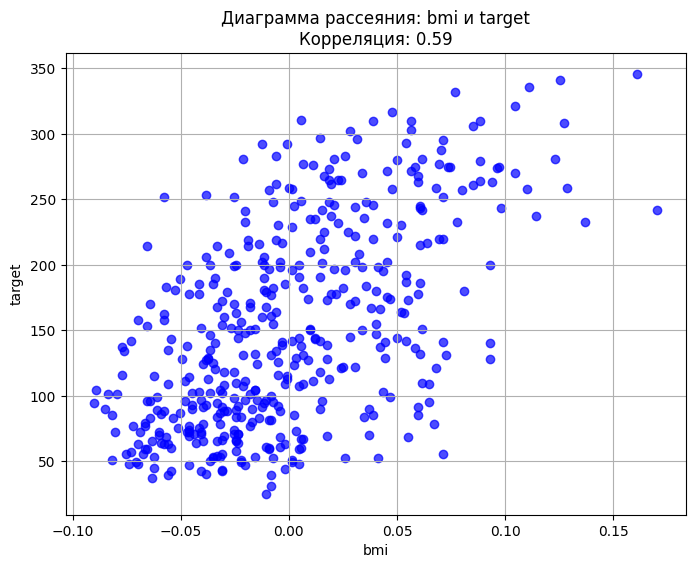

In [17]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

correlation_matrix = diabetes_df.corr()

most_correlated_feature = correlation_matrix['target'].drop('target').idxmax()
max_correlation = correlation_matrix['target'][most_correlated_feature]

plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df[most_correlated_feature], diabetes_df['target'], alpha=0.7, color='blue')
plt.title(f"Диаграмма рассеяния: {most_correlated_feature} и target\nКорреляция: {max_correlation:.2f}")
plt.xlabel(most_correlated_feature)
plt.ylabel('target')
plt.grid(True)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [18]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

correlation_matrix = diabetes_df.corr()

top_5_features = correlation_matrix['target'].drop('target').nlargest(5).index.tolist()

X = diabetes_df[top_5_features]
y = diabetes_df['target']

print("Топ-5 признаков с самой высокой корреляцией с целевым значением:")
print(top_5_features)

Топ-5 признаков с самой высокой корреляцией с целевым значением:
['bmi', 's5', 'bp', 's4', 's6']


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Размер обучающей выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")
print(f"Размер обучающей выборки y_train: {y_train.shape}")
print(f"Размер тестовой выборки y_test: {y_test.shape}")

Размер обучающей выборки X_train: (331, 5)
Размер тестовой выборки X_test: (111, 5)
Размер обучающей выборки y_train: (331,)
Размер тестовой выборки y_test: (111,)


8. Выполните обучение модели.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R^2): {r2:.4f}")

Среднеквадратичная ошибка (MSE): 2773.4878
Коэффициент детерминации (R^2): 0.4984


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из средней квадратичной ошибки (RMSE): {rmse:.4f}")

Среднеквадратичная ошибка (MSE): 2773.4878
Корень из средней квадратичной ошибки (RMSE): 52.6639


10. Расчитайте R² (коэффициент детерминации)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из средней квадратичной ошибки (RMSE): {rmse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

Среднеквадратичная ошибка (MSE): 2773.4878
Корень из средней квадратичной ошибки (RMSE): 52.6639
Коэффициент детерминации (R²): 0.4984


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?